In [1]:
from geotile import GeoTile 

In [2]:
PATH_TRAIN_X = r'../../data/end_to_end_DL/X_train.tif'
PATH_TRAIN_Y = r'../../data/end_to_end_DL/train_x_vector.shp'
PATH_TEST_X = r'../../data/end_to_end_DL/X_test.tif'
PATH_TEST_Y = r'../../data/end_to_end_DL/test_x_vector.shp'

In [3]:
gt_train = GeoTile(PATH_TRAIN_X)
gt_train.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 3246,
 'height': 2147,
 'count': 4,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(8.983152841195215e-05, 0.0, 83.87794386645002,
        0.0, -8.983152841195215e-05, 28.293517851685273)}

In [20]:
gt_train.generate_tiles(r'../../data/end_to_end_DL/train_x_tiles', prefix='train_')

In [21]:
gt_train.rasterization(PATH_TRAIN_Y, '../../data/end_to_end_DL/y_train.tif')

In [4]:
gt_train_y = GeoTile('../../data/end_to_end_DL/y_train.tif')
gt_train_y.generate_tiles(r'../../data/end_to_end_DL/train_y_tiles', prefix='train_')

In [5]:
gt_test = GeoTile(PATH_TEST_X)

gt_test.generate_tiles('../../data/end_to_end_DL/test_x_tiles', prefix = 'test_')

gt_test.rasterization(PATH_TEST_Y, '../../data/end_to_end_DL/y_test.tif')

gt_test_y = GeoTile('../../data/end_to_end_DL/y_test.tif')
gt_test_y.generate_tiles(r'../../data/end_to_end_DL/test_y_tiles', prefix = 'test_')


In [6]:
# generate tiles and store it inside geotile package
gt_train.generate_tiles(save_tiles=False)
gt_train_y.generate_tiles(save_tiles=False)

# preprocessing (eg. convert nan to zero and normalization of tiles)
gt_train.convert_nan_to_zero()
# gt_train.normalize_tiles()

# save it as a numpy array
# gt_train.save_numpy('../../data/end_to_end_DL/X_train.npy')
# gt_train_y.save_numpy('../../data/end_to_end_DL/y_train.npy')

In [7]:
gt_train.normalize_tiles()

In [9]:
import numpy as np
gt_train.tile_data.min(), gt_train.tile_data.max()

(0.0, 1.0)

In [10]:
gt_train.save_numpy('../../data/end_to_end_DL/X_train.npy')
gt_train_y.save_numpy('../../data/end_to_end_DL/y_train.npy')

In [13]:
# generate tiles and store it inside geotile package
gt_test.generate_tiles(save_tiles=False)
gt_test_y.generate_tiles(save_tiles=False)

# preprocessing (eg. convert nan to zero and normalization of tiles)
gt_test.convert_nan_to_zero()
gt_test.normalize_tiles()

# save it as a numpy array
gt_test.save_numpy('../../data/end_to_end_DL/X_test.npy')
gt_test_y.save_numpy('../../data/end_to_end_DL/y_test.npy')

In [14]:
import numpy as np

X_train = np.load('../../data/end_to_end_DL/X_train.npy')
X_train.max(), X_train.min(), X_train.dtype, X_train.shape

(1.0, 0.0, dtype('float32'), (442, 256, 256, 4))

In [15]:
y_train= np.load('../../data/end_to_end_DL/y_train.npy')

289


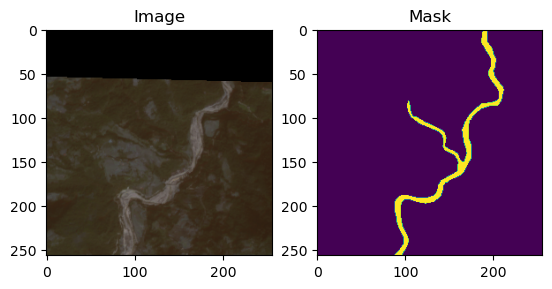

In [68]:
import matplotlib.pyplot as plt

# Let's plot a sample input RGB image and output image with buildings
fig, (ax1, ax2) = plt.subplots(1,2)
img = np.random.randint(0, 442)
print(img)
ax1.imshow(X_train[img, :, :, :3])
ax2.imshow(y_train[img, :, :, 0])
ax1.set_title("Image")
ax2.set_title('Mask')
plt.show()